# Nastri Lorenzo





# Examen 2: POO
fecha: 30/11/2023
* El examen se aprueba con 60 puntos. Tienen hasta 11.15 am. 
* Entregar un solo archivo Jupyter con nombre y apellido.
* Todas las consignas deben tener justificación con texto y explicación conceptual. No del código sino de la razón de la operación.

Datasets:
* conversion_para_entrenar.csv
* ingreso_para_entrenar.csv
* conversion_para_predecir.csv
* costo_publicidad.csv
* conversion_real.csv

## Supermercado La gondola. Año 2092
 
El supermercado la gondola es un líder en el sector minorista, atendiendo a clientes en el planeta tierra y con una sucursal en marte. Cuenta con una diversa gama de productos que incluye alimentación, tecnología, moda, entre otros. El supermercado posee toda su operacion de manera Holografica, por lo tanto es crucial predecir la conversión de los clientes dado su comportamiento. La idea será efectuar una campaña de marketing en aquello clientes que un algoritmo clasifique como compradores. Ahora bien dado que el costo de las publicidades holograficas es elevado, la empresa quiere solo publicitar en los clientes de alto valor. Para esto es importante generar una regresion que permita predecir el ingreso del cliente. 
 
Tu tarea como cientifico de datos es crear los dos algoritmos y luego calcular el rango de ganancia esperada de la propuesta, justificando tus servicios en el ROI del supermercado. 

	


# Clasificacion  (30 pts)
**total de la consigna (30 pts) Separado en preprocesamiento 20pts y modelo 10pts**

1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

```python

def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']
```
3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)
```python
df_con_dummies = pd.get_dummies(df, columns=["cols_for_one_hot"])
```

### Modelo (10pts)
4. Separar train y test. Fitear un arbol de profundidad 3. 

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
```
5. Crear y_pred
6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test
```python
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
```
5. Explicar la metrica precision_score en palabras. Que significa en este contexto?

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 
```python
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Clase1', 'Clase2'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 
```

###  Regresión (20 pts)

Instrucciones y Puntaje:
1. Valores faltantes. (5 pts)

Este dataset **no tiene valores outliers** para que sea mas fácil la resolución del examen. 
Lo que si **tiene son valores nulos** en solo dos columnas. 

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

3.Entrenamiento y Validación del Modelo de Regresión (10 pts)
* Divida el conjunto de datos en entrenamiento y test. 
* Entrene un algoritmo de regresion que prediga ingreso.


```python
import statsmodels.api as sm
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
```
* Evalue el modelo utilizando la metrica MAPE




```python
import numpy as np
predicciones = modelo.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")
```
* Interprete los coeficiente que significan (Explicar en palabras)
* Intereprete el error MAPE que significa? (Explicar en palabras)


#### Cálculo del ROI



\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}



____

In [2793]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2794]:
df_conversion_para_entrenar = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/parciales/segundo_parcial/examen/conversion_para_entrenar.csv")
df_conversion_para_entrenar.head()

,,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [2795]:
df_conversion_para_entrenar.columns

Index(['     ', 'id del cliente ', 'páginas visitadas ',
       'duración de la sesión ', 'número de visitas ',
       'fecha de nacimiento        ', 'ubicación ', 'dispositivo ',
       'convertido'],
      dtype='object')

### Remuevo los espacios en blanco de cada columna para poder trabajar mejor.

In [2796]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
df_conversion_para_entrenar = whitespace_remover_and_columns(df_conversion_para_entrenar)

In [2797]:
df_conversion_para_entrenar.columns

Index(['', 'id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

### Procedo a sacar la columna ''

In [2798]:
df_conversion_para_entrenar.drop(columns = [""], inplace = True)

### Hago validación de la data para ver si hay valores nulos, etc.

In [2799]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_conversion_para_entrenar)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
id del cliente,NaN,3000.0,0,0.0,"[1832, 2495, 540, 1856, 152]"
páginas visitadas,NaN,3000.0,0,0.0,"[5, 2, 9, 4, 3]"
duración de la sesión,NaN,3000.0,0,0.0,"[246.76641759875332, 213.17615527667456, 319.2..."
número de visitas,NaN,3000.0,0,0.0,"[25, 19, 25, 40, 6]"
fecha de nacimiento,90,3000,0,0.0,"[1955-11-30 12:27:39.148023, 1992-11-20 12:27:..."
ubicación,4,3000,0,0.0,"[Ciudad B, Ciudad B, Ciudad A, Ciudad A, Ciuda..."
dispositivo,3,3000,0,0.0,"[tablet, ordenador, ordenador, tablet, ordenador]"
convertido,2,3000,0,0.0,"[Sí, No, Sí, Sí, No]"


1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

In [2800]:
df_conversion_para_entrenar.head()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [2801]:
df_conversion_para_entrenar["ubicación"].value_counts()

ubicación
Ciudad B    1396
Ciudad A    1394
Marte        150
Ciudad C      60
Name: count, dtype: int64

### Hago boxplot para comparar las variables de navegación entre Marte y Tierra

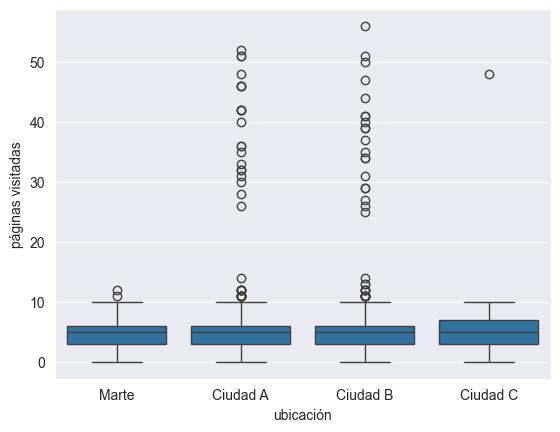

In [2802]:
sns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["páginas visitadas"])
sns.set_style("darkgrid")

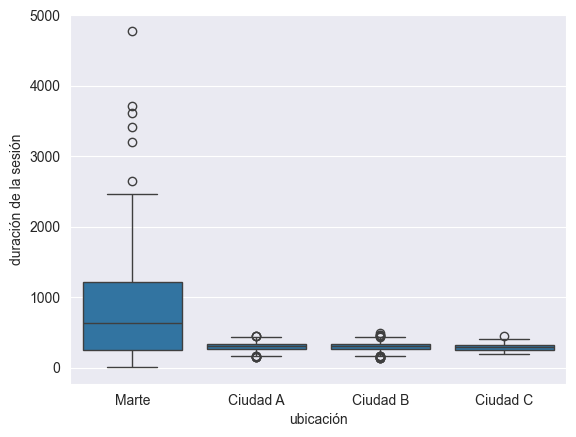

In [2803]:
sns.boxplot(x=df_conversion_para_entrenar["ubicación"], y=df_conversion_para_entrenar["duración de la sesión"])
sns.set_style("darkgrid")

In [2804]:
from scipy.stats import ttest_ind

group1 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] == "Marte"]["duración de la sesión"]
group2 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]["duración de la sesión"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte en la variable número de visitas.")
else:
    print("No rechazar la hipótesis nula. No una diferencia significativa entre Marte en la variable número de visitas.")

Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte en la variable número de visitas.


### Procedo a eliminar los valores de Marte, ya que no me sirve tener en cuenta los datos de Marte para predecir el comportamiento de los clientes en la Tierra. Tampoco es mucha la cantidad de datos que tengo de Marte, por lo que no me afecta mucho el eliminarlos.

In [2805]:
df_conversion_para_entrenar = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]

### Paso la variable de convertido a dummies para poder trabajar mejor con ella. Veo que onda tasa de conversion por ciudad

In [2806]:
df_conversion_para_entrenar['convertido'] = df_conversion_para_entrenar['convertido'].map({'Sí': 1, 'No': 0})


In [2807]:
df_conversion_para_entrenar

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
150,151,8,414.129933,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,0
151,152,3,247.930919,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,0
152,153,4,261.724178,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,0
153,154,2,294.076794,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,0
154,155,5,363.287411,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,1
...,...,...,...,...,...,...,...,...
2995,2996,6,213.400237,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,0
2996,2997,3,359.351304,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,0
2997,2998,9,352.961711,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,0
2998,2999,7,230.507817,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,0


In [2808]:
df_conversion_para_entrenar.groupby("ubicación").agg({"convertido": "mean"}).reset_index()

,ubicación,convertido
0,Ciudad A,0.483501
1,Ciudad B,0.483524
2,Ciudad C,0.516667


___

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

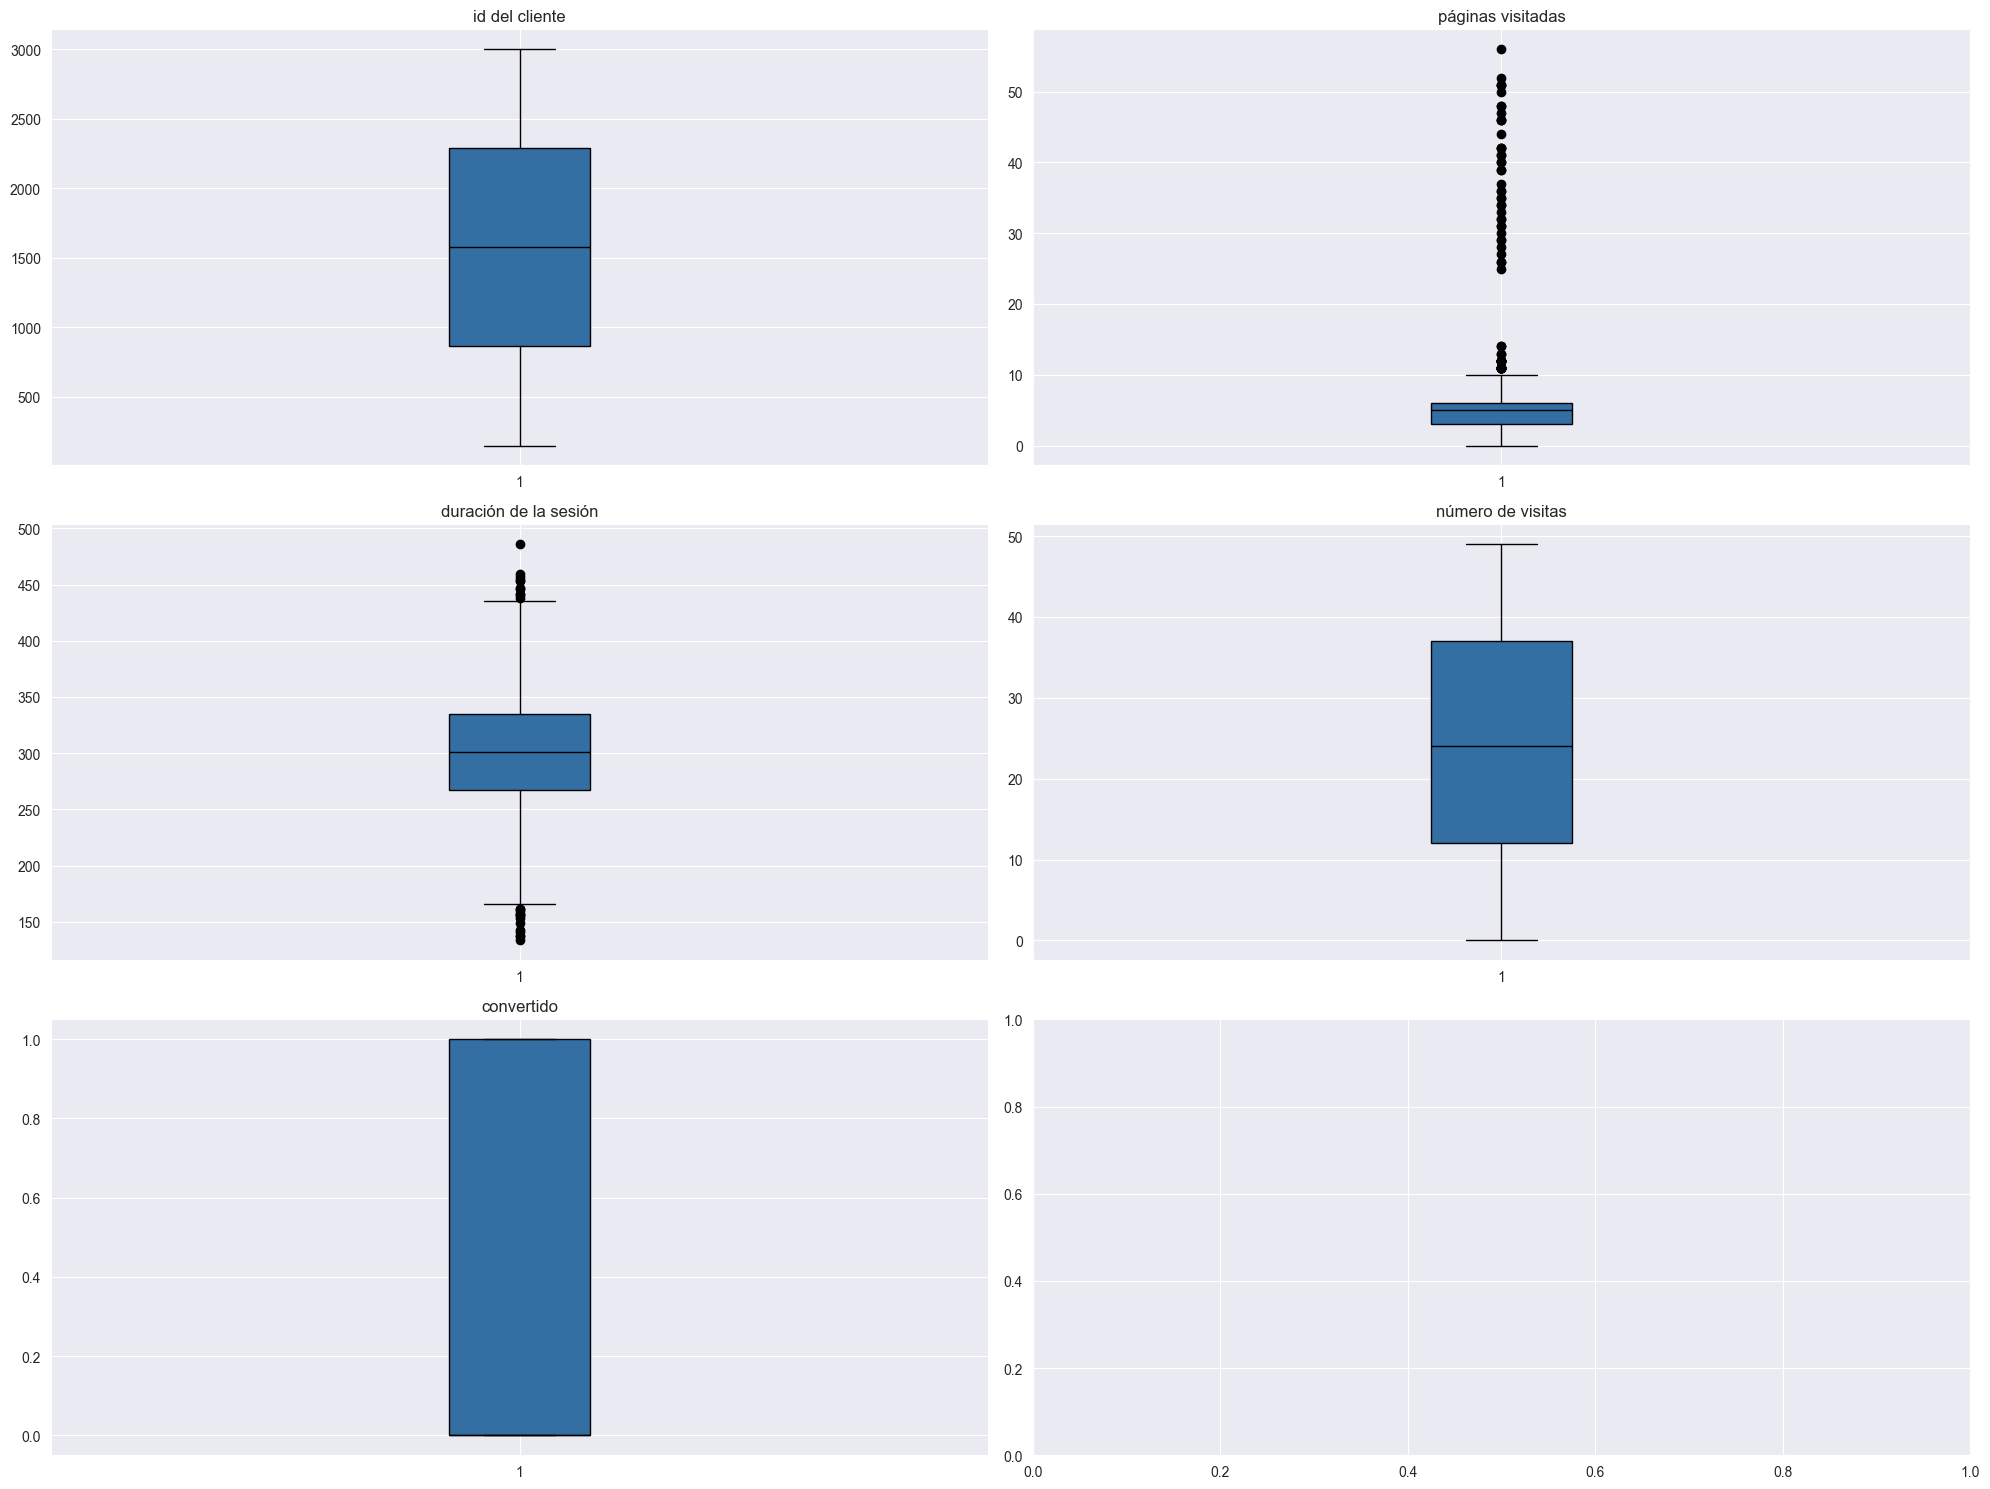

In [2809]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_conversion_para_entrenar)

In [2810]:
def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']

### Solamente saco una columna de las dos que tienen outliers, ya que el modelo de árbol de decisión es robusto a outliers. La que mas afectaria al modelo sería páginas visitadas ya que es la que mayor cantidad de valores outliers tiene.

In [2811]:
df_conversion_para_entrenar.shape

(2850, 8)

In [2812]:
df_conversion_para_entrenar = find_and_filter_outliers(df_conversion_para_entrenar, "páginas visitadas")

In [2813]:
df_conversion_para_entrenar["is_outlier"].value_counts()

is_outlier
No    2776
Name: count, dtype: int64

### El dataframe al parecer tenía 74 valores outliers dado que el dataset original tenía 2850 filas y ahora pasó a tener 2776 filas.

### Decido sacar paginas visitadas ya que lo más comun es visitar entre 1 y 10 páginas. Es muy raro que se visiten por encima de 20 o 30 paginas. Además siento que es un poco más común que haya mas duración de la sesión que páginas visitadas.

___

3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)

In [2814]:
df_con_dummies = pd.get_dummies(df_conversion_para_entrenar, columns=["ubicación", "dispositivo"])

In [2815]:
df_con_dummies['duración de la sesión'] = df_conversion_para_entrenar['duración de la sesión'].astype(int)

In [2816]:
df_con_dummies

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,convertido,is_outlier,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet
150,151,8,414,11,2005-11-17 12:27:39.148023,0,No,True,False,False,True,False,False
151,152,3,247,6,1986-11-22 12:27:39.148023,0,No,False,True,False,False,True,False
152,153,4,261,19,1966-11-27 12:27:39.148023,0,No,False,True,False,False,True,False
153,154,2,294,31,1975-11-25 12:27:39.148023,0,No,False,True,False,False,False,True
154,155,5,363,23,1998-11-19 12:27:39.148023,1,No,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,6,213,6,1962-11-28 12:27:39.148023,0,No,False,True,False,False,True,False
2996,2997,3,359,7,1962-11-28 12:27:39.148023,0,No,False,True,False,False,True,False
2997,2998,9,352,33,1980-11-23 12:27:39.148023,0,No,True,False,False,False,True,False
2998,2999,7,230,13,1982-11-23 12:27:39.148023,0,No,True,False,False,False,True,False


In [2817]:
X = df_con_dummies[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C" ]]
y = df_con_dummies["convertido"]

___

4. Separar train y test. Fitear un arbol de profundidad 3. 

In [2818]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [2819]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

In [2820]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)  
print('Puntuación de validación cruzada:', score)

# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train) # Agarra todo de train y aplicale el modelo. 
print("Precisión en entrenamiento =", dt_train_accuracy) 

# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test) # Agarra todo de test y aplicale el modelo.
print("Precisión en pruebas =", dt_test_accuracy)

Puntuación de validación cruzada: [0.49820144 0.51171171 0.4972973  0.47747748 0.47567568]
Precisión en entrenamiento = 0.5369369369369369
Precisión en pruebas = 0.5161870503597122


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

### La precisión en entrenamiento es un 2% mas alta que en el de pruebas.

___

5. Crear y_pred

In [2821]:
decision_tree_model = decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

___

6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test

In [2822]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


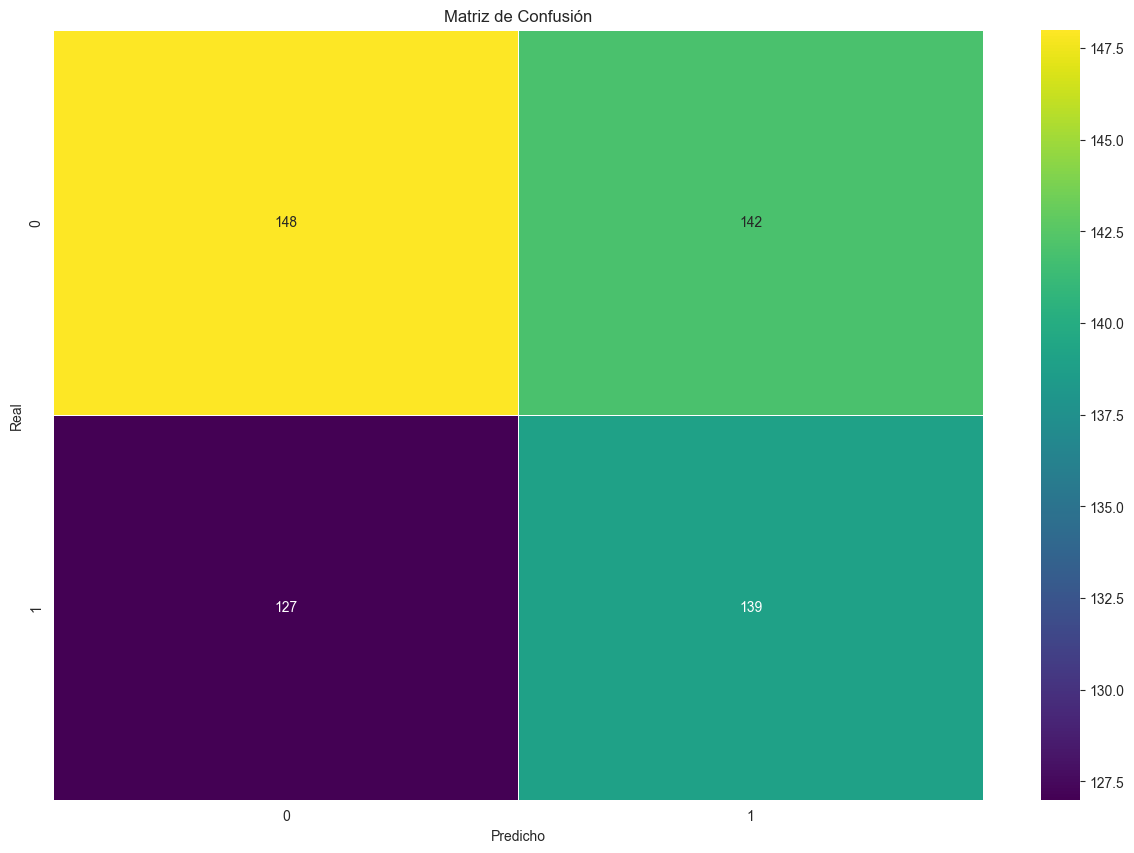

In [2823]:
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

#### La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

#### Aplicado a este contexto de clasificación, la precisión es la relación entre los clientes que realmente compraron y los clientes que el modelo predijo que compraron.

In [2824]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

print("Precisión:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Exactitud:", accuracy_score(y_true, y_pred))

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

Precisión: 0.49466192170818507
Recall: 0.5225563909774437
Exactitud: 0.5161870503597122


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

___

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 

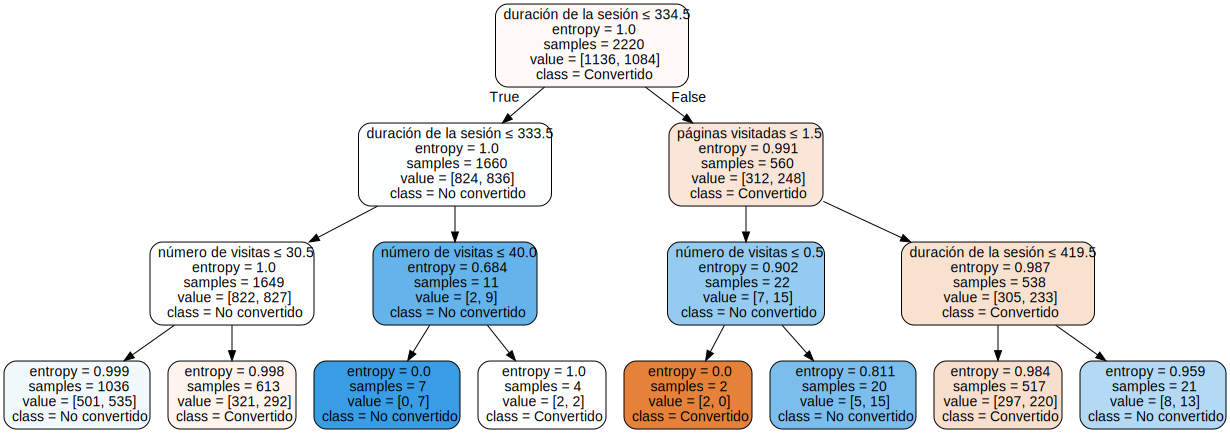

In [2825]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Convertido', 'No convertido'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 

____

###  Regresión

In [2826]:
df_ingreso_para_entrenar = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/parciales/segundo_parcial/examen/ingreso_para_entrenar.csv")
df_ingreso_para_entrenar 

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,4,240.416776,1219.513664,253.962295,NaN,3,38.493164,366.779166
...,...,...,...,...,...,...,...,...
995,995,182.423866,1002.584977,698.971819,3.0,0,89.929168,532.971139
996,996,925.582218,1437.091201,167.954906,4.0,6,64.596994,589.117449
997,997,223.136768,149.989124,282.340894,6.0,4,43.710203,178.161379
998,998,955.213618,132.729346,267.534149,4.0,3,38.721009,420.855709


In [2827]:
df_ingreso_para_entrenar.drop(columns = ["Unnamed: 0"], inplace = True)

In [2828]:
df_ingreso_para_entrenar.isna().sum()

gasto_alimentacion            0
gasto_tecnologia              0
gasto_moda                   50
frecuencia_compra            80
promociones_utilizadas        0
distancia_a_hipermercados     0
ingreso_cliente               0
dtype: int64

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

In [2829]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
246.279263    1
346.348181    1
543.015112    1
404.211353    1
710.117553    1
             ..
337.879162    1
392.177382    1
326.789766    1
140.768750    1
703.560526    1
Name: count, Length: 950, dtype: int64

In [2830]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts().sort_values(ascending=True)

frecuencia_compra
0.0       5
11.0      6
10.0     11
1.0      26
9.0      29
8.0      51
2.0      68
7.0      91
3.0     134
6.0     148
4.0     168
5.0     183
Name: count, dtype: int64

### La columna la cual sus valores nulos van a ser reemplazados por 0 es 'gasto_moda'. En cambio, 'frecuencia_compra' va a ser reemplazada por la media porque no tiene sentido que un cliente no haya comprado nunca. Es decir, tener gastos, pero no haber comprado nunca??? No existe.

In [2831]:
df_ingreso_para_entrenar[df_ingreso_para_entrenar["frecuencia_compra"] == 0]

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
37,187.904903,1100.911819,NaN,0.0,5,26.937772,109.212050
153,540.507484,1036.204119,669.483660,0.0,1,80.624644,375.298177
521,442.801771,1404.932239,150.826347,0.0,5,56.827913,252.323877
630,742.014627,1146.436827,524.533909,0.0,0,63.260652,496.673436
863,496.686472,840.289032,486.216720,0.0,8,35.971322,346.598443


In [2832]:
df_ingreso_para_entrenar["gasto_moda"].fillna(0, inplace=True)

In [2833]:
df_ingreso_para_entrenar["frecuencia_compra"].fillna(df_ingreso_para_entrenar["frecuencia_compra"].median(), inplace=True)

In [2834]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
0.000000      50
246.279263     1
346.348181     1
543.015112     1
404.211353     1
              ..
337.879162     1
392.177382     1
326.789766     1
140.768750     1
703.560526     1
Name: count, Length: 951, dtype: int64

In [2835]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts()

frecuencia_compra
5.0     263
4.0     168
6.0     148
3.0     134
7.0      91
2.0      68
8.0      51
9.0      29
1.0      26
10.0     11
11.0      6
0.0       5
Name: count, dtype: int64

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

In [2836]:
df_ingreso_para_entrenar

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,240.416776,1219.513664,253.962295,5.0,3,38.493164,366.779166
...,...,...,...,...,...,...,...
995,182.423866,1002.584977,698.971819,3.0,0,89.929168,532.971139
996,925.582218,1437.091201,167.954906,4.0,6,64.596994,589.117449
997,223.136768,149.989124,282.340894,6.0,4,43.710203,178.161379
998,955.213618,132.729346,267.534149,4.0,3,38.721009,420.855709


<Axes: >

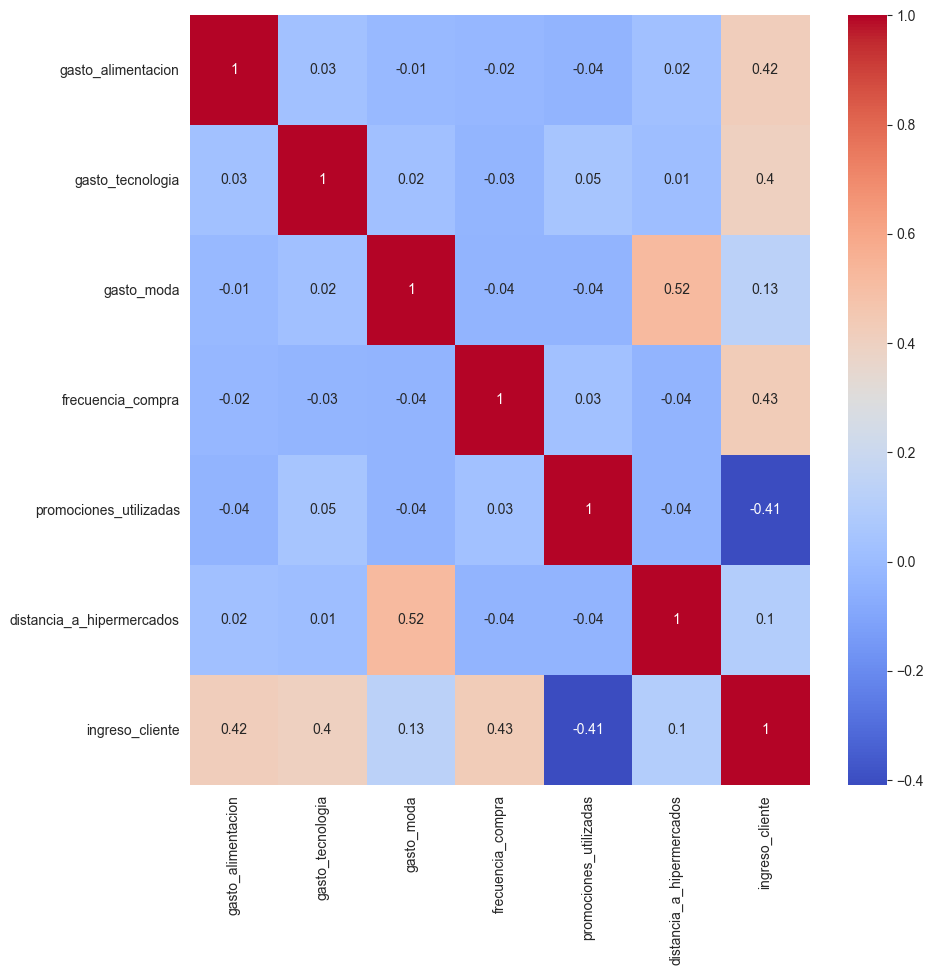

In [2837]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(df_ingreso_para_entrenar.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

### Decido elegir las variables a continuación ya que son las que mas correlación tienen con el ingreso del cliente. Gasto_moda no tiene tanta, pero la dejo por el simple hecho de que pongo a los otros dos tipos de gastos.

In [2838]:
X = df_ingreso_para_entrenar[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]]
y = df_ingreso_para_entrenar['ingreso_cliente']

In [2839]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [2840]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

LinearRegression()

In [2841]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
gasto_moda,0.115265
frecuencia_compra,49.220987
gasto_alimentacion,0.306040
gasto_tecnologia,0.191998


#### Los coeficientes son números que indican cómo cambia la variable dependiente (en este caso, `ingreso_cliente`) en respuesta a cambios en las variables independientes (X). 

#### El coeficiente más grande (en valor absoluto) indicaría cual es la variable más explicativa o que más impacto tiene. En este caso es `frecuencia_compra`. Que tenga un coeficiente de 49, significa que probablemente sea una persona que tiene más ingresos, ya que compra más seguido.

#### El coeficiemte de gasto_moda es de 0.1, lo cual indica que la variable dependiente (ingreso_cliente) no cambia mucho en respuesta a cambios en la variable independiente (gasto_moda). Por lo tanto, la variable que no considero importante para la predicción del ingreso del cliente es `gasto_moda`. Con gasto_tecnología ocurre algo similar, su coeficiente es de 0.2.

#### El coeficiemte de gasto_alimentacion es de 0.3 (un poquito mas representativo que los otros 2 tipos de gastos, pero no tanto como frecuencia_compra).


In [2842]:
y_pred = regressor.predict(X_test)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [2843]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
993,570.939669,404.550384
859,397.849304,375.984425
298,373.738068,420.483083
553,668.922801,741.871008
672,631.876828,535.480046
971,166.302855,664.512439
27,494.235282,425.546312
231,396.957635,367.464596
306,698.974318,509.376026
706,448.957609,438.423337


In [2844]:
import numpy as np
predicciones = regressor.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")

MAPE: 53.90655520229903%


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### Un MAPE de 53.9% significa que el modelo predice el ingreso del cliente con un error del 53.9%. Es decir, el modelo predice el ingreso del cliente con un error del 53.9%% en promedio.

___


##  Integración de Modelos y ROI en Publicidad 


## Explicación:

### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

### Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = Suma de Costo_{publicidad}
\end{equation*}


\begin{equation*}
CostoPublicidad_{desperdiciado} = FP_{i} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{i}$ son los clientes especificios que fueron falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv


#### Cálculo del ROI


\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}



## Consignas ganancia del modelo (50pts):
#### a. Implemente el modelo entrenado anteriormente y prediga los modelos en dataset para predecir.
#### b. Calcule la estimación del valor esperado de esos clientes. Prob_compra * Ingreso estimado.Cual es el valor esperado del modelo?  
#### c. Dado los resultados en el punto (1) del examen. Estime en 1000 clientes nuevos cuantos esperaría que fueran FP? (redonde para arriba en caso de necesitarlo)  Calcule entonces el Costo de publicidad desperdiciada dada esa estimación.
#### d. Luego de estas estimaciones paso 1 mes y ahora sabemos que clientes convirtieron dataset **conversion_real.csv**. Calcule entonces el ROI cliente a cliente. 
#### e. Cual es el costo de publicidad despediciado ahora que sabemos que cliente convirtio?
#### f. que cliente tiene mayor ROI?
```python
.nlargest(1, 'roi')
```
#### 1f. ¿Cual es la ganancia real del modelo?




___

In [2845]:
df_ingreso_para_predecir = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/parciales/segundo_parcial/examen/ingreso_para_predecir.csv")
df_ingreso_para_predecir

,Unnamed: 0.1,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids
0,0,0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000
1,1,1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001
2,2,2,642.487038,1178.947183,562.292464,NaN,7,61.158411,5002
3,3,3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003
4,4,4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004
...,...,...,...,...,...,...,...,...,...
2995,2995,2995,947.518364,201.137656,435.053377,7.0,2,51.121916,7995
2996,2996,2996,591.519474,252.315674,104.166510,6.0,6,37.357515,7996
2997,2997,2997,391.252339,1059.958165,101.863543,4.0,4,42.325673,7997
2998,2998,2998,832.190516,751.360091,618.547984,6.0,0,43.444348,7998


In [2846]:
df_ingreso_para_predecir["gasto_moda"].fillna(0, inplace=True)

In [2847]:
df_ingreso_para_predecir["frecuencia_compra"].fillna(df_ingreso_para_predecir["frecuencia_compra"].median(), inplace=True)

In [2848]:
df_conversion_para_predecir = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/parciales/segundo_parcial/examen/conversion_para_predecir.csv")
df_conversion_para_predecir

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,ids
0,0,8,3270.001480,21,1917-05-18,Marte,móvil,5000
1,1,11,972.813149,27,1920-11-28,Ciudad C,móvil,5001
2,2,9,3791.649383,31,1922-06-21,Marte,móvil,5002
3,3,7,1148.957241,45,1928-04-20,Ciudad C,tablet,5003
4,4,2,1228.190036,32,1922-02-21,Ciudad A,móvil,5004
...,...,...,...,...,...,...,...,...
995,995,9,2084.372983,8,1918-06-12,Ciudad A,tablet,5995
996,996,3,2618.110259,27,1918-09-10,Marte,móvil,5996
997,997,7,3975.894457,41,1918-07-12,Ciudad C,móvil,5997
998,998,9,1986.668367,18,1917-03-19,Ciudad B,tablet,5998


In [2849]:
df_ingreso_para_predecir["ingreso_predicho"] = regressor.predict(df_ingreso_para_predecir[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]])
df_ingreso_para_predecir

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Unnamed: 0.1,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids,ingreso_predicho
0,0,0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000,410.428044
1,1,1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001,570.171784
2,2,2,642.487038,1178.947183,562.292464,5.0,7,61.158411,5002,602.667300
3,3,3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003,649.163377
4,4,4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004,363.246410
...,...,...,...,...,...,...,...,...,...,...
2995,2995,2995,947.518364,201.137656,435.053377,7.0,2,51.121916,7995,592.057590
2996,2996,2996,591.519474,252.315674,104.166510,6.0,6,37.357515,7996,405.573009
2997,2997,2997,391.252339,1059.958165,101.863543,4.0,4,42.325673,7997,400.641389
2998,2998,2998,832.190516,751.360091,618.547984,6.0,0,43.444348,7998,634.333680


In [2850]:
df_conversion_para_predecir.columns

Index(['    ', 'páginas visitadas ', 'duración de la sesión ',
       'número de visitas ', 'fecha de nacimiento ', 'ubicación ',
       'dispositivo ', 'ids'],
      dtype='object')

In [2851]:
from funciones.funciones_parcial2 import whitespace_remover_and_columns
df_conversion_para_predecir = whitespace_remover_and_columns(df_conversion_para_predecir)

In [2852]:
df_con_dummies2 = pd.get_dummies(df_conversion_para_predecir, columns=["ubicación", "dispositivo"])

In [2853]:
df_con_dummies2['duración de la sesión'] = df_conversion_para_predecir['duración de la sesión'].astype(int)

In [2854]:
df_con_dummies2

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,ubicación_Marte,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet
0,0,8,3270,21,1917-05-18,5000,False,False,False,True,True,False,False
1,1,11,972,27,1920-11-28,5001,False,False,True,False,True,False,False
2,2,9,3791,31,1922-06-21,5002,False,False,False,True,True,False,False
3,3,7,1148,45,1928-04-20,5003,False,False,True,False,False,False,True
4,4,2,1228,32,1922-02-21,5004,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,9,2084,8,1918-06-12,5995,True,False,False,False,False,False,True
996,996,3,2618,27,1918-09-10,5996,False,False,False,True,True,False,False
997,997,7,3975,41,1918-07-12,5997,False,False,True,False,True,False,False
998,998,9,1986,18,1917-03-19,5998,False,True,False,False,False,False,True


In [2855]:
df_con_dummies2["conversion_predicha"] = decision_tree_model.predict(df_con_dummies2[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C" ]])
df_con_dummies2

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,ubicación_Marte,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,conversion_predicha
0,0,8,3270,21,1917-05-18,5000,False,False,False,True,True,False,False,1
1,1,11,972,27,1920-11-28,5001,False,False,True,False,True,False,False,1
2,2,9,3791,31,1922-06-21,5002,False,False,False,True,True,False,False,1
3,3,7,1148,45,1928-04-20,5003,False,False,True,False,False,False,True,1
4,4,2,1228,32,1922-02-21,5004,True,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,9,2084,8,1918-06-12,5995,True,False,False,False,False,False,True,1
996,996,3,2618,27,1918-09-10,5996,False,False,False,True,True,False,False,1
997,997,7,3975,41,1918-07-12,5997,False,False,True,False,True,False,False,1
998,998,9,1986,18,1917-03-19,5998,False,True,False,False,False,False,True,1


___

#### b. Calcule la estimación del valor esperado de esos clientes. Prob_compra * Ingreso estimado.Cual es el valor esperado del modelo?  

In [2856]:
df_merged = pd.merge(df_con_dummies2, df_ingreso_para_predecir, on='ids')

expected_value = (df_merged['conversion_predicha'] * df_merged['ingreso_predicho']).sum()

print('El valor esperado del modelo es de:', expected_value)

El valor esperado del modelo es de: 443257.0408016812


___

### c. Dado los resultados en el punto (1) del examen. Estime en 1000 clientes nuevos cuantos esperaría que fueran FP? (redonde para arriba en caso de necesitarlo)  Calcule entonces el Costo de publicidad desperdiciada dada esa estimación.

In [2857]:
costo_publicidad = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/parciales/segundo_parcial/examen/costo_publicidad.csv")
costo_publicidad

,,ids,costo_publicidad
0,0,5000,209
1,1,5001,185
2,2,5002,328
3,3,5003,383
4,4,5004,281
...,...,...,...
2995,2995,7995,411
2996,2996,7996,246
2997,2997,7997,151
2998,2998,7998,343


In [2860]:
costo_publicidad["costo_publicidad"].sum()

971305